In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.regularizers import l2
import numpy as np
import matplotlib.pyplot as plt

In [7]:
img_size = (128, 128)
batch_size = 32

In [12]:
from zipfile import ZipFile
with ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/images')
print("Extraction done!")


Extraction done!


In [13]:
import os
for root, dirs, files in os.walk('/content/images'):
    print(root)

/content/images
/content/images/Train
/content/images/Train/Up
/content/images/Train/Down
/content/images/Test
/content/images/Test/Up
/content/images/Test/Down


In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory("/content/images/Train",image_size=(128,128),batch_size=32,
label_mode="binary",shuffle=True,seed=42)

test_ds = tf.keras.utils.image_dataset_from_directory("/content/images/Test",image_size=(128,128),batch_size=32,
label_mode="binary",shuffle=False)


Found 1433 files belonging to 2 classes.
Found 351 files belonging to 2 classes.


In [15]:
data_augmentation = tf.keras.Sequential([layers.RandomFlip("horizontal"),layers.RandomRotation(0.1),layers.RandomZoom(0.1),
])
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (data_augmentation(x) / 255.0, y),
    num_parallel_calls=AUTOTUNE
).prefetch(AUTOTUNE)

test_ds = test_ds.map(lambda x, y: (x / 255.0, y),
    num_parallel_calls=AUTOTUNE
).prefetch(AUTOTUNE)


In [16]:
model = models.Sequential([
    layers.Conv2D(16,(3,3), activation='relu',kernel_regularizer=l2(0.001),input_shape=(128,128,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32,(3,3),activation='relu',kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,(3,3), activation='relu',kernel_regularizer=l2(0.001)),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),loss="binary_crossentropy",metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,629,473 (6.22 MB)

 Trainable params: 1,629,473 (6.22 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(train_ds,epochs=15,validation_data=test_ds)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - accuracy: 0.5333 - loss: 0.7631 - val_accuracy: 0.5527 - val_loss: 0.7633
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 165ms/step - accuracy: 0.5527 - loss: 0.7610 - val_accuracy: 0.5527 - val_loss: 0.7540
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.5591 - loss: 0.7532 - val_accuracy: 0.5499 - val_loss: 0.7544
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.5652 - loss: 0.7535 - val_accuracy: 0.5499 - val_loss: 0.7511
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.5589 - loss: 0.7466 - val_accuracy: 0.5499 - val_loss: 0.7487
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 186ms/step - accuracy: 0.5708 - loss: 0.7431 - val_accuracy: 0.5499 - val_loss: 0.7488
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 187ms/step - accuracy: 0.5531 - loss: 0.7475 - val_accuracy: 0.5527 - val_loss: 0.7480
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 8s 173ms/step - accuracy: 0.5607 - loss: 0.7433 - val_accuracy:

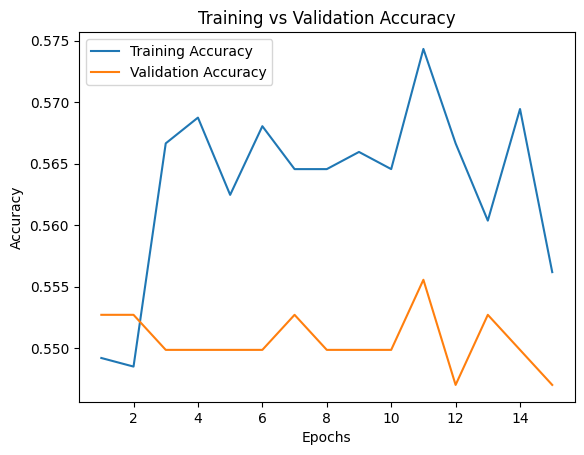

In [20]:
epochs=range(1,len(history.history['accuracy']) + 1)
plt.figure()
plt.plot(epochs,history.history['accuracy'])
plt.plot(epochs,history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()


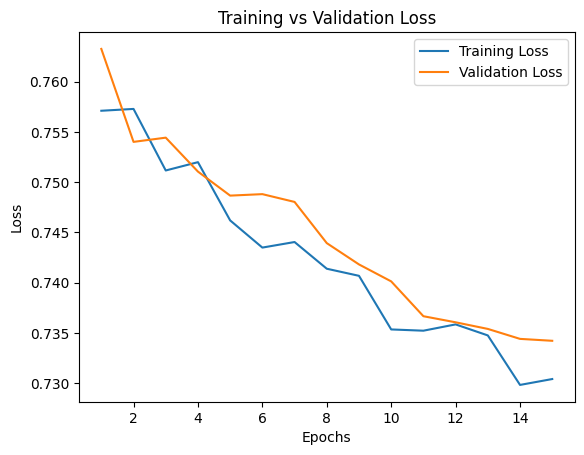

In [21]:
plt.figure()
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()